## 16 QPSK-modulation-demodulation

Python script for QPSK modulation and demodulation

It first generates 16 bits binary signal then perform modulation.

Then, it adds noise and demodulates the signal. 

Since, we add some noise after modulation, demodulate signal obtained does not exactly match with the original signal.


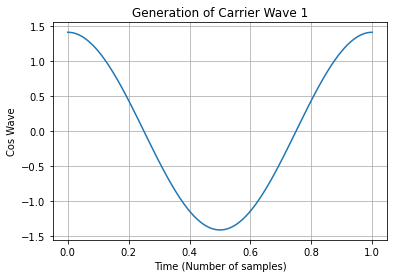

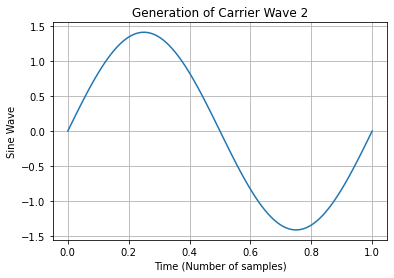

In [107]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
import random

t = np.linspace(0,1,100)  # Time
tb = 1;
fc = 1;    # carrier frequency

ca = sqrt(2/tb)*np.cos(2*np.pi*fc*t)  # carrier frequency cosine wave
c2 = sqrt(2/tb)*np.sin(2*np.pi*fc*t)  # carrier frequency sine wave

fig, ax1 = plt.subplots()

ax1.plot(t, c1)
ax1.grid()
ax1.set_xlabel('Time (Number of samples)')
ax1.set_ylabel('Cos Wave')
plt.title('Generation of Carrier Wave 1')
plt.show()

fig, ax2 = plt.subplots()
ax2.plot(t, c2)
ax2.grid()
ax2.set_xlabel('Time (Number of samples)')
ax2.set_ylabel('Sine Wave')
plt.title('Generation of Carrier Wave 2')
plt.show()




In [108]:
mapping_table = {
    (0,0,0,0) : -3-3j,
    (0,0,0,1) : -3-1j,
    (0,0,1,0) : -3+3j,
    (0,0,1,1) : -3+1j,
    (0,1,0,0) : -1-3j,
    (0,1,0,1) : -1-1j,
    (0,1,1,0) : -1+3j,
    (0,1,1,1) : -1+1j,
    (1,0,0,0) :  3-3j,
    (1,0,0,1) :  3-1j,
    (1,0,1,0) :  3+3j,
    (1,0,1,1) :  3+1j,
    (1,1,0,0) :  1-3j,
    (1,1,0,1) :  1-1j,
    (1,1,1,0) :  1+3j,
    (1,1,1,1) :  1+1j
}

def Mapping(bits):
    return np.array([mapping_table[tuple(b)] for b in bits])

def SP(bits):
    return bits.reshape((-1,4))

def QPSK_time(QAM_data, cc, cs):
    QPSK = list()
    for d in QAM_data:
        QPSK.append([c+1j*s for (c,s) in (cc,cs)] )
    
    return QPSK


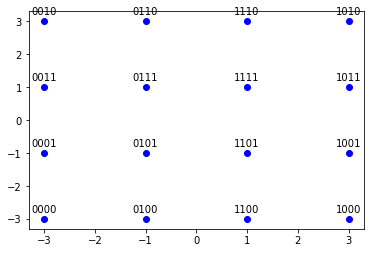

In [109]:
for b3 in [0, 1]:
    for b2 in [0, 1]:
        for b1 in [0, 1]:
            for b0 in [0, 1]:
                B = (b3, b2, b1, b0)
                Q = mapping_table[B]
                plt.plot(Q.real, Q.imag, 'bo')
                plt.text(Q.real, Q.imag+0.2, "".join(str(x) for x in B), ha='center')

[0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0]
Bits count:  40
First 20 bits:  [0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0]
Mean of bits (should be around 0.5):  0.525
First 5 bit groups
[[0 1 1 0]
 [0 0 0 1]
 [0 1 0 0]
 [1 1 0 0]
 [0 1 1 0]]
First 5 QAM symbols and bits:
[-1.+3.j -3.-1.j -1.-3.j  1.-3.j -1.+3.j]


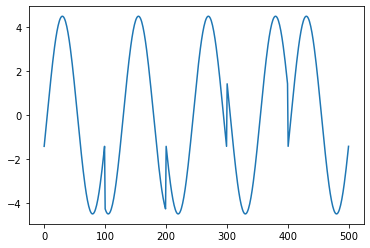

In [148]:
mu = 4
bits = np.random.binomial(n=1, p=0.5, size=(mu*10,))
#bits = np.array([ 0, 0, 1, 1,0, 0, 1, 1,0, 0, 1, 1,0, 0, 1, 1,0, 0, 1, 1,0, 0, 1, 1  ])
print(bits[:5*mu])
print ("Bits count: ", len(bits))
print ("First 20 bits: ", bits[:20])
print ("Mean of bits (should be around 0.5): ", np.mean(bits))

bits_SP = SP(bits)
print ("First 5 bit groups")
print (bits_SP[:5,:])


QAM_data = Mapping(bits_SP)
print ("First 5 QAM symbols and bits:")
print (QAM_data[:5])

QPSK = list()
for d in QAM_data[:5]:
    QPSK += ([d.real*c1[n]+d.imag*c2[n] for n,c in enumerate(c1)])
    

plt.plot((QPSK))

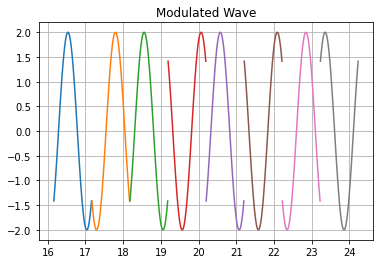

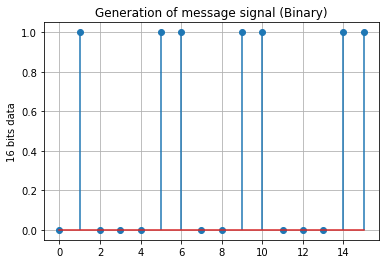

In [95]:
## modulation

odd_sig = np.zeros((16,100))
even_sig = np.zeros((16,100))
fig, ax4 = plt.subplots()
for i in range(0,15,2):
    t = np.linspace(t1,t2,100)
    if (m[i]>0.5):
        m[i] = 1
        m_s = np.ones((1,len(t)))
    else:
        m[i] = 0
        m_s = (-1)*np.ones((1,len(t)))

    odd_sig[i,:] = c1*m_s

    if (m[i+1]>0.5):
        m[i+1] = 1
        m_s = np.ones((1,len(t)))
    else:
        m[i+1] = 0
        m_s = (-1)*np.ones((1,len(t)))

    even_sig[i,:] = c2*m_s

    qpsk = odd_sig + even_sig   # modulated wave = oddbits + evenbits

    ax4.plot(t,qpsk[i,:])
    t1 = t1 + (tb+0.01)
    t2 = t2 + (tb+0.01)

ax4.grid()
plt.title('Modulated Wave')
plt.show()


fig, ax3 = plt.subplots()
ax3.stem(range(16), m,use_line_collection=True)
ax3.grid()
ax3.set_ylabel('16 bits data')
plt.title('Generation of message signal (Binary)')
plt.show()





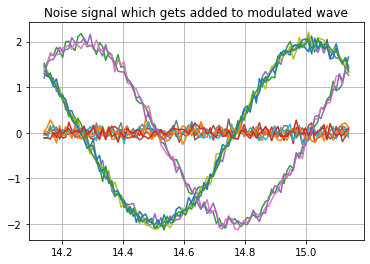

In [2]:
## noise
noise = np.random.normal(0, 0.1, [16,100]) # noise using random function

channel = noise + qpsk    # adding noise to qpsk modulated wave

fig, ax5 = plt.subplots()
for i in range(0,15,1):
       ax5.plot(t,channel[i,:])

ax5.grid()
plt.title('Noise signal which gets added to modulated wave')
plt.show()






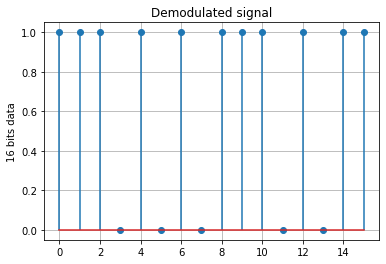

In [3]:
## demodulation


t1 = 0
t2 = tb

demod = np.zeros((16,1))    # demodulated signal  (demodulation of noise + qpsk modulated wave)

for i in range(0,15,1):
    t = np.linspace(t1,t2,100)
    x1 = sum(c1*channel[i,:])
    x2 = sum(c2*channel[i,:])

    if(x1>0 and x2>0):
        demod[i] = 1
        demod[i+1] = 1
    elif (x1>0 and x2<0):
        demod[i] = 1
        demod[i+1] = 0
    elif (x1<0 and x2<0):
        demod[i] = 0
        demod[i+1] = 0
    elif (x1<0 and x2>0):
        demod[i] = 0
        demod[i+1] = 1

    t1 = t1 + (tb+0.01)
    t2 = t2 + (tb+0.01)


fig, ax6 = plt.subplots()
ax6.stem(range(16), demod,use_line_collection=True)
ax6.grid()
ax6.set_ylabel('16 bits data')
plt.title('Demodulated signal')
plt.show()